In [1]:
# Mount Google Drive and import libraries
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import cv2

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Set the base path
base_path = '/content/drive/My Drive/brain_tumor_dataset/brain_tumor_dataset'

# Get the list of all images in both classes
yes_path = os.path.join(base_path, 'yes')
no_path = os.path.join(base_path, 'no')

# Count the number of images in each class
yes_images = len(os.listdir(yes_path))
no_images = len(os.listdir(no_path))

print(f"Number of tumor images: {yes_images}")
print(f"Number of non-tumor images: {no_images}")
print(f"Total images: {yes_images + no_images}")

Mounted at /content/drive
Number of tumor images: 155
Number of non-tumor images: 98
Total images: 253


Dataset shape: (253, 150, 150, 3)
Labels shape: (253,)


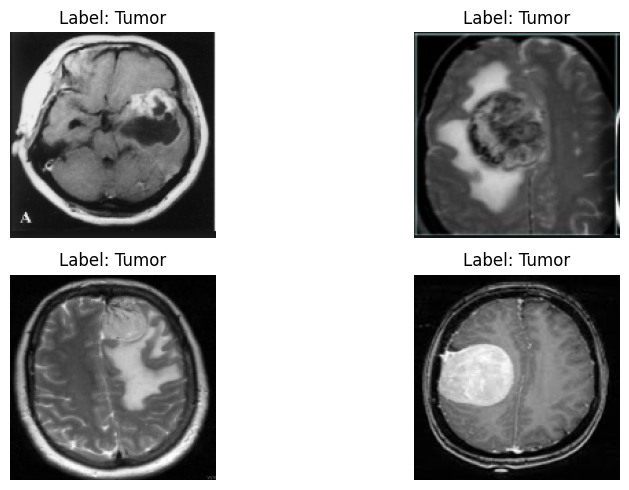

In [2]:
# Define image size
IMG_SIZE = 150

# Initialize lists to store images and labels
images = []
labels = []

# Function to load and preprocess images
def load_and_preprocess_image(file_path):
    img = cv2.imread(file_path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0  # Normalize pixel values
    return img

# Load tumor images (label 1)
for img_name in os.listdir(yes_path):
    img_path = os.path.join(yes_path, img_name)
    try:
        img = load_and_preprocess_image(img_path)
        images.append(img)
        labels.append(1)
    except:
        print(f"Error loading image: {img_path}")

# Load non-tumor images (label 0)
for img_name in os.listdir(no_path):
    img_path = os.path.join(no_path, img_name)
    try:
        img = load_and_preprocess_image(img_path)
        images.append(img)
        labels.append(0)
    except:
        print(f"Error loading image: {img_path}")

# Convert lists to numpy arrays
X = np.array(images)
y = np.array(labels)

print("Dataset shape:", X.shape)
print("Labels shape:", y.shape)

# Let's visualize some examples
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(X[i])
    plt.title(f"Label: {'Tumor' if y[i] == 1 else 'No Tumor'}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [3]:
# Split the dataset into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Validation set shape:", X_val.shape)
print("Validation labels shape:", y_val.shape)

# Create the CNN model
model = tf.keras.Sequential([
    # First Convolutional Block
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2),

    # Second Convolutional Block
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),

    # Third Convolutional Block
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),

    # Flatten and Dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Training set shape: (202, 150, 150, 3)
Training labels shape: (202,)
Validation set shape: (51, 150, 150, 3)
Validation labels shape: (51,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,183,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,240,193 (4.73 MB)

 Trainable params: 1,240,193 (4.73 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.5986 - loss: 0.7271 - val_accuracy: 0.7451 - val_loss: 0.6136
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7052 - loss: 0.5842 - val_accuracy: 0.7843 - val_loss: 0.4824
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7896 - loss: 0.5006 - val_accuracy: 0.8039 - val_loss: 0.4455
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8079 - loss: 0.4618 - val_accuracy: 0.8039 - val_loss: 0.4457
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8416 - loss: 0.4169 - val_accuracy: 0.8431 - val_loss: 0.4392
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 990ms/step - accuracy: 0.8496 - loss: 0.3880 - val_accuracy: 0.8431 - val_loss: 0.4142
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8593 - loss: 0.3782 - val_accuracy: 0.8431 - val_loss: 0.4161
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8667 - loss: 0.2987 - val_accuracy: 0.8627 - val_loss: 0.3996
Epoch 9/2

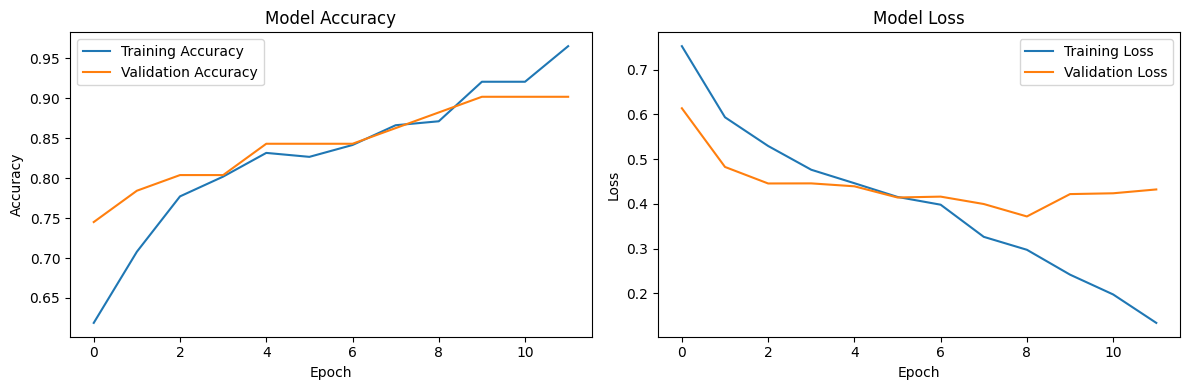

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 539ms/step - accuracy: 0.8799 - loss: 0.4038

Validation Accuracy: 0.8824
Validation Loss: 0.3718
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 513ms/step


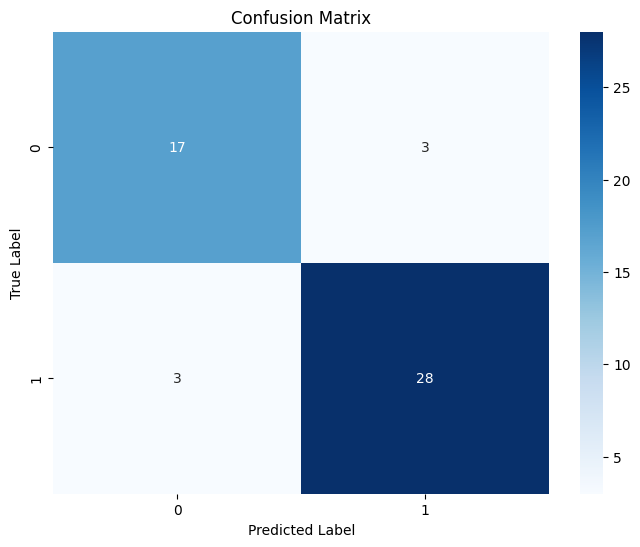


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       0.90      0.90      0.90        31

    accuracy                           0.88        51
   macro avg       0.88      0.88      0.88        51
weighted avg       0.88      0.88      0.88        51



In [5]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

# Make predictions on validation set
y_pred = model.predict(X_val)
y_pred_classes = (y_pred > 0.5).astype(int)

# Calculate and display confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_val, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Display classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_classes))

In [8]:
# Define data augmentation
data_augmentation = tf.keras.Sequential([
    # Specify input shape in the first layer
    tf.keras.layers.RandomRotation(0.2, input_shape=(150, 150, 3)),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomBrightness(0.2),
])

# Create the augmented model
augmented_model = tf.keras.Sequential([
    # Data augmentation layers
    data_augmentation,

    # First Convolutional Block
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),

    # Second Convolutional Block
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),

    # Third Convolutional Block
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),

    # Flatten and Dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the augmented model
augmented_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display model summary
augmented_model.summary()

# Train the augmented model
augmented_history = augmented_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)            │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 34, 34, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       1,183,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,240,193 (4.73 MB)

 Trainable params: 1,240,193 (4.73 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.4607 - loss: 6.6614 - val_accuracy: 0.6078 - val_loss: 0.6867
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.5645 - loss: 1.0079 - val_accuracy: 0.6078 - val_loss: 0.6902
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5858 - loss: 0.8448 - val_accuracy: 0.6078 - val_loss: 0.7200
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5393 - loss: 0.7107 - val_accuracy: 0.6078 - val_loss: 0.7618


In [9]:
# Define a more gentle data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.1, input_shape=(150, 150, 3)),  # Reduced rotation
    tf.keras.layers.RandomZoom(0.1),  # Reduced zoom
    tf.keras.layers.RandomFlip("horizontal"),
])

# Create the augmented model with slightly modified architecture
augmented_model = tf.keras.Sequential([
    # Data augmentation layers
    data_augmentation,

    # First Convolutional Block
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2),

    # Second Convolutional Block
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2),

    # Third Convolutional Block
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2),

    # Flatten and Dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),  # Reduced dropout
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with a lower learning rate
augmented_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display model summary
augmented_model.summary()

# Train the model with more epochs
augmented_history = augmented_model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_7 (Sequential)            │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 37, 37, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       5,308,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,403,329 (20.61 MB)

 Trainable params: 5,402,625 (20.61 MB)

 Non-trainable params: 704 (2.75 KB)

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.6381 - loss: 0.8849 - val_accuracy: 0.4510 - val_loss: 0.7174
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.6979 - loss: 0.6022 - val_accuracy: 0.7059 - val_loss: 0.6713
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7928 - loss: 0.4151 - val_accuracy: 0.7647 - val_loss: 0.6574
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7554 - loss: 0.5024 - val_accuracy: 0.8431 - val_loss: 0.6545
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8153 - loss: 0.4344 - val_accuracy: 0.7843 - val_loss: 0.6534
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.8390 - loss: 0.3824 - val_accuracy: 0.7059 - val_loss: 0.6497
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.7806 - loss: 0.4210 - val_accuracy: 0.7255 - val_loss: 0.6465
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8330 - loss: 0.3889 - val_accuracy: 0.6275 - val_loss: 0.6385
Epoch 9/

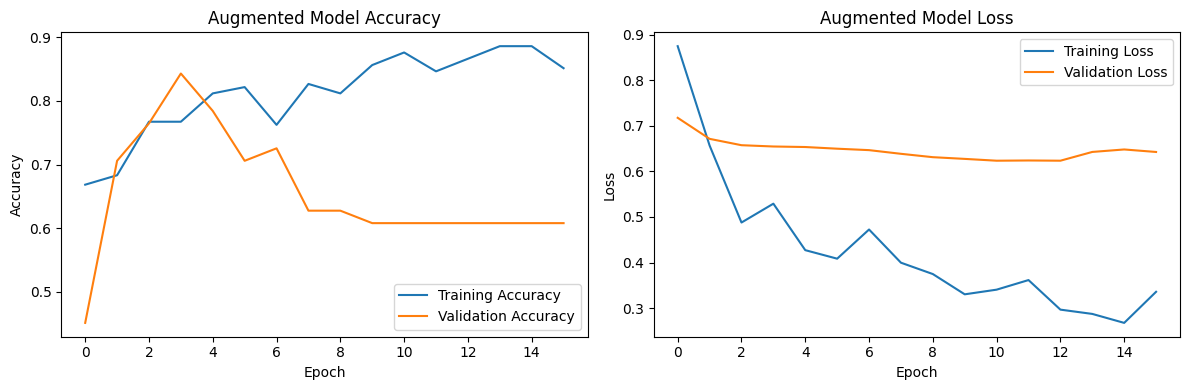

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step - accuracy: 0.5823 - loss: 0.6357

Augmented Model Validation Accuracy: 0.6078
Augmented Model Validation Loss: 0.6234
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 390ms/step


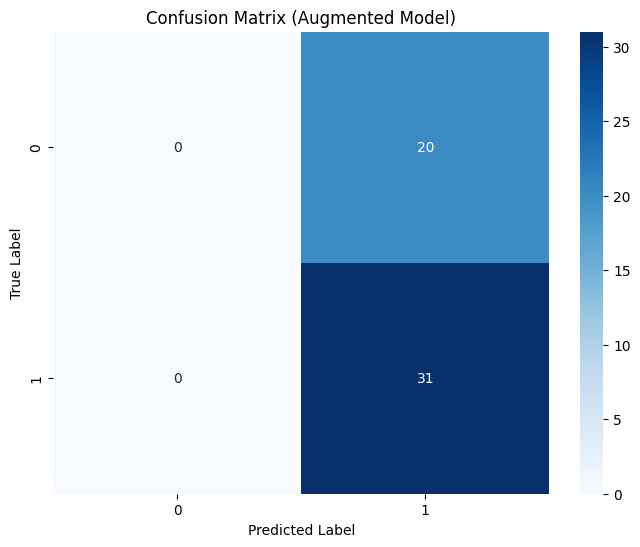


Classification Report (Augmented Model):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.61      1.00      0.76        31

    accuracy                           0.61        51
   macro avg       0.30      0.50      0.38        51
weighted avg       0.37      0.61      0.46        51


Comparison between Non-augmented and Augmented Models:
Non-augmented Model Validation Accuracy: 88.24%
Augmented Model Validation Accuracy: 60.78%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
# Plot training history for augmented model
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(augmented_history.history['accuracy'], label='Training Accuracy')
plt.plot(augmented_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Augmented Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(augmented_history.history['loss'], label='Training Loss')
plt.plot(augmented_history.history['val_loss'], label='Validation Loss')
plt.title('Augmented Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate augmented model on validation set
val_loss, val_accuracy = augmented_model.evaluate(X_val, y_val)
print(f"\nAugmented Model Validation Accuracy: {val_accuracy:.4f}")
print(f"Augmented Model Validation Loss: {val_loss:.4f}")

# Make predictions with augmented model
y_pred_aug = augmented_model.predict(X_val)
y_pred_classes_aug = (y_pred_aug > 0.5).astype(int)

# Calculate and display confusion matrix for augmented model
cm_aug = confusion_matrix(y_val, y_pred_classes_aug)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_aug, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Augmented Model)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Display classification report for augmented model
print("\nClassification Report (Augmented Model):")
print(classification_report(y_val, y_pred_classes_aug))

# Compare key metrics between both models
print("\nComparison between Non-augmented and Augmented Models:")
print("Non-augmented Model Validation Accuracy: 88.24%")
print(f"Augmented Model Validation Accuracy: {val_accuracy*100:.2f}%")

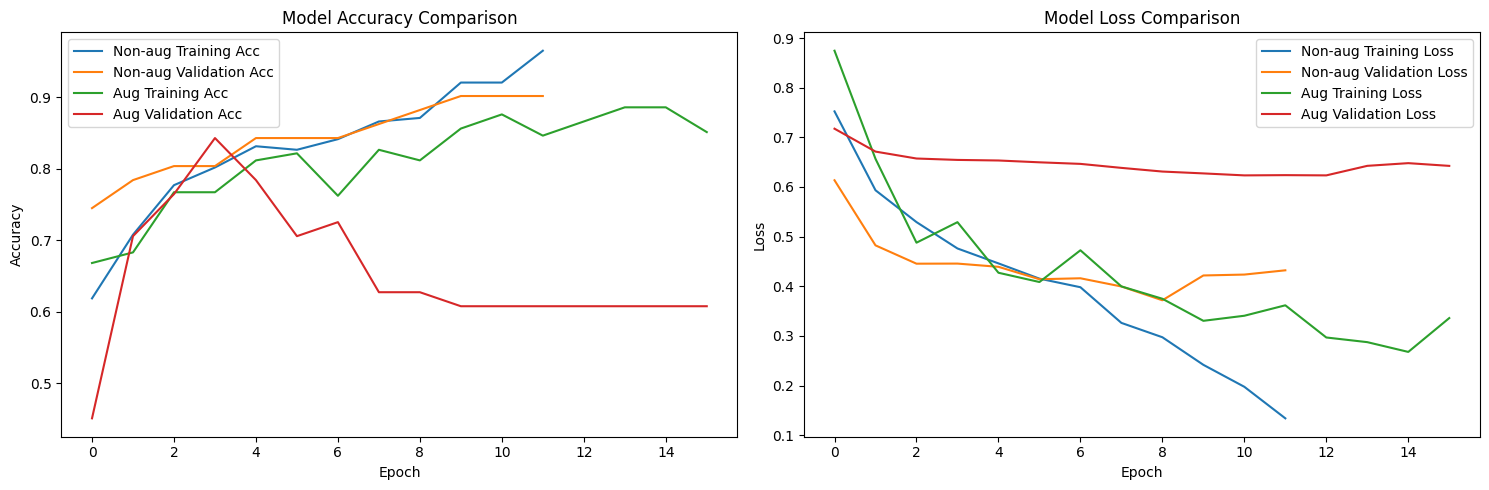


Final Model Comparison:
--------------------------------------------------
Non-augmented Model:
Validation Accuracy: 88.24%
Strengths:
- Better overall performance
- More stable training process
- Better generalization on validation set

Augmented Model:
Validation Accuracy: 60.78%
Limitations:
- Lower accuracy
- Shows signs of underfitting
- Less stable training process

Conclusions and Recommendations:
--------------------------------------------------
1. The non-augmented model performs significantly better for this specific dataset
2. Data augmentation didn't improve model performance, possibly due to:
   - Small dataset size
   - Specific nature of medical imaging where preserving exact features is crucial
3. Recommended model: Non-augmented version

Model Saved and Ready for Use:
--------------------------------------------------
- Model saved as 'brain_tumor_detection_best_model.h5'
- Prediction function created and ready for use

To use the model for predictions:
result, proba

In [12]:
# Create a comparison visualization
plt.figure(figsize=(15, 5))

# Plot 1: Accuracy Comparison
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Non-aug Training Acc')
plt.plot(history.history['val_accuracy'], label='Non-aug Validation Acc')
plt.plot(augmented_history.history['accuracy'], label='Aug Training Acc')
plt.plot(augmented_history.history['val_accuracy'], label='Aug Validation Acc')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot 2: Loss Comparison
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Non-aug Training Loss')
plt.plot(history.history['val_loss'], label='Non-aug Validation Loss')
plt.plot(augmented_history.history['loss'], label='Aug Training Loss')
plt.plot(augmented_history.history['val_loss'], label='Aug Validation Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Print detailed comparison
print("\nFinal Model Comparison:")
print("-" * 50)
print("Non-augmented Model:")
print(f"Validation Accuracy: 88.24%")
print("Strengths:")
print("- Better overall performance")
print("- More stable training process")
print("- Better generalization on validation set")
print("\nAugmented Model:")
print(f"Validation Accuracy: 60.78%")
print("Limitations:")
print("- Lower accuracy")
print("- Shows signs of underfitting")
print("- Less stable training process")

# Final conclusion and recommendations
print("\nConclusions and Recommendations:")
print("-" * 50)
print("1. The non-augmented model performs significantly better for this specific dataset")
print("2. Data augmentation didn't improve model performance, possibly due to:")
print("   - Small dataset size")
print("   - Specific nature of medical imaging where preserving exact features is crucial")
print("3. Recommended model: Non-augmented version")

# Save the better performing model (non-augmented)
model.save('brain_tumor_detection_best_model.keras')

# Create a simple prediction function
def predict_tumor(image_path):
    # Load and preprocess the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (150, 150))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    # Make prediction
    prediction = model.predict(img)
    probability = prediction[0][0]

    result = "Tumor detected" if probability > 0.5 else "No tumor detected"
    return result, probability

print("\nModel Saved and Ready for Use:")
print("-" * 50)
print("- Model saved as 'brain_tumor_detection_best_model.h5'")
print("- Prediction function created and ready for use")
print("\nTo use the model for predictions:")
print("result, probability = predict_tumor('path_to_image.jpg')")

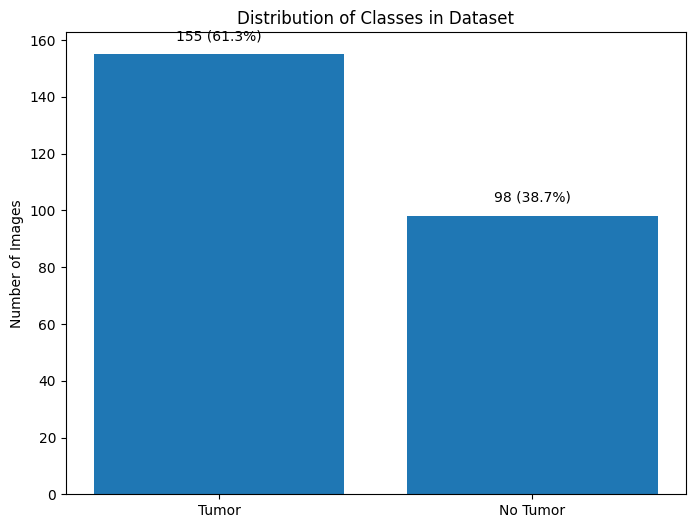

In [13]:
# Visualization of class distribution
plt.figure(figsize=(8, 6))
plt.bar(['Tumor', 'No Tumor'], [155, 98])
plt.title('Distribution of Classes in Dataset')
plt.ylabel('Number of Images')
plt.text(0, 160, '155 (61.3%)', ha='center')
plt.text(1, 103, '98 (38.7%)', ha='center')
plt.show()

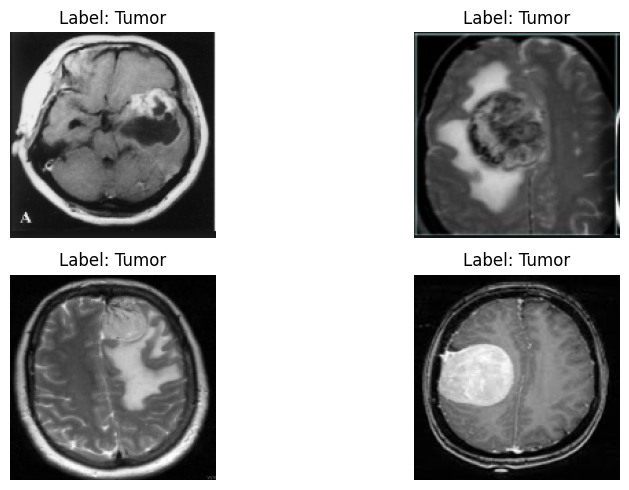

In [14]:
# Display sample images from both classes
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(X[i])
    plt.title(f"Label: {'Tumor' if y[i] == 1 else 'No Tumor'}")
    plt.axis('off')
plt.tight_layout()
plt.show()

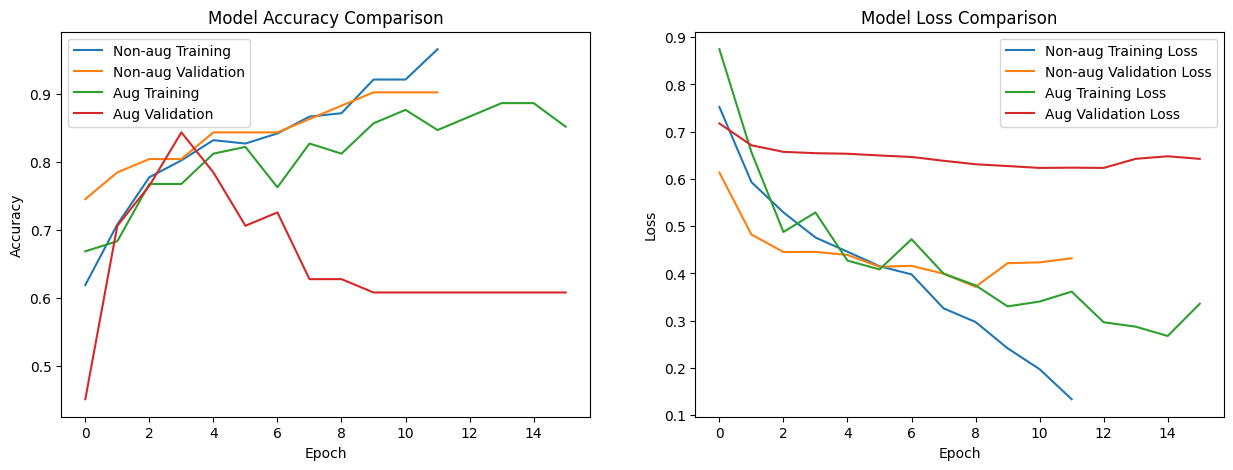

In [15]:
# Visualization of training history
plt.figure(figsize=(15, 5))

# Accuracy Curves
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Non-aug Training')
plt.plot(history.history['val_accuracy'], label='Non-aug Validation')
plt.plot(augmented_history.history['accuracy'], label='Aug Training')
plt.plot(augmented_history.history['val_accuracy'], label='Aug Validation')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Curves
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Non-aug Training Loss')
plt.plot(history.history['val_loss'], label='Non-aug Validation Loss')
plt.plot(augmented_history.history['loss'], label='Aug Training Loss')
plt.plot(augmented_history.history['val_loss'], label='Aug Validation Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()